In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 
import re 
import math

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_table("~/Documents/final project data/train.tsv",index_col=0)
print(train.shape)
train.head(3)

/usr/local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(1482535, 7)


,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


# Category Name

In [3]:
catlevels=train.category_name.astype('str').str.split('/',expand=True)
catlevels.rename(columns={0:'cat1', 1:'cat2', 2:'cat3', 3:'cat4', 4:'cat5'},inplace=True)
catlevels.fillna('missing',inplace=True)
train = pd.concat([train, catlevels], axis=1)

In [4]:
print(train.shape)
train.head(3)

(1482535, 12)


,name,item_condition_id,category_name,brand_name,price,shipping,item_description,cat1,cat2,cat3,cat4,cat5
train_id,,,,,,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts,missing,missing
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,missing,missing
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,missing,missing


# Missing values

In [5]:
def mv(dataset):
    dataset.name.fillna(value="missing", inplace=True)
    dataset.item_condition_id.fillna(value=1, inplace=True)
    dataset.category_name.fillna(value="missing", inplace=True)
    dataset.brand_name.fillna(value="missing", inplace=True)
    dataset.shipping.fillna(value=1, inplace=True)
    dataset.item_description.fillna(value="No description yet", inplace=True)
    dataset.cat1.fillna(value="missing", inplace=True)
    dataset.cat2.fillna(value="missing", inplace=True)
    dataset.cat3.fillna(value="missing", inplace=True)
    dataset.cat4.fillna(value="missing", inplace=True)
    dataset.cat5.fillna(value="missing", inplace=True)
    
#     miss = []
#     for i in dataset['item_description']:
#         if (i=='No description yet'):
#             miss.append("missing")
#         else: miss.append(i)
#     dataset['item_description'] = miss
    
    return (dataset)

train = mv(train)
train.head(3)

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,cat1,cat2,cat3,cat4,cat5
train_id,,,,,,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,missing,10.0,1,No description yet,Men,Tops,T-shirts,missing,missing
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,missing,missing
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,missing,missing


In [6]:
train_mv = train.isnull().sum(axis=0).reset_index()
train_mv.columns = ['column_name', 'no_missing']
train_mv['missing_ratio'] = train_mv['no_missing'] / train.shape[0]
train_mv.sort_values(by='no_missing',ascending=True, inplace=True)
train_mv

,column_name,no_missing,missing_ratio
0,name,0,0.0
1,item_condition_id,0,0.0
2,category_name,0,0.0
3,brand_name,0,0.0
4,price,0,0.0
5,shipping,0,0.0
6,item_description,0,0.0
7,cat1,0,0.0
8,cat2,0,0.0
9,cat3,0,0.0


# Categorical data

In [7]:
le = LabelEncoder()

le.fit(np.hstack([train.brand_name]))
train.brand_name = le.transform(train.brand_name)

le.fit(np.hstack([train.cat1,train.cat2,train.cat3,train.cat4,train.cat5]))
train.cat1 = le.transform(train.cat1)
train.cat2 = le.transform(train.cat2)
train.cat3 = le.transform(train.cat3)
train.cat4 = le.transform(train.cat4)
train.cat5 = le.transform(train.cat5)

del le
train.head(3)

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,cat1,cat2,cat3,cat4,cat5
train_id,,,,,,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,4786,10.0,1,No description yet,554,859,827,950,950
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,3557,52.0,0,This keyboard is in great condition and works ...,312,234,233,950,950
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,4180,10.0,1,Adorable top with a hint of lace and a key hol...,934,860,104,950,950


# Text

In [8]:
# Lower all the letters
train['name'] = [s.lower() for s in train['name']]
train['item_description'] = [s.lower() for s in train['item_description']]

/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x174aa2438>]], dtype=object)

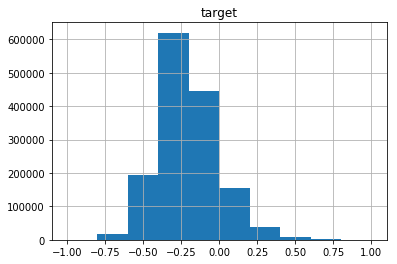

In [9]:
# Scale target variable
train["target"] = np.log(train.price+1)
target_scaler = MinMaxScaler(feature_range=(-1, 1))
train["target"] = target_scaler.fit_transform(train.target.reshape(-1,1))
pd.DataFrame(train.target).hist()

In [10]:
print(train.shape)
train.head()

(1482535, 13)


,name,item_condition_id,category_name,brand_name,price,shipping,item_description,cat1,cat2,cat3,cat4,cat5,target
train_id,,,,,,,,,,,,,
0,mlb cincinnati reds t shirt size xl,3,Men/Tops/T-shirts,4786,10.0,1,no description yet,554,859,827,950,950,-0.369464
1,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,3557,52.0,0,this keyboard is in great condition and works ...,312,234,233,950,950,0.044005
2,ava-viv blouse,1,Women/Tops & Blouses/Blouse,4180,10.0,1,adorable top with a hint of lace and a key hol...,934,860,104,950,950,-0.369464
3,leather horse statues,1,Home/Home Décor/Home Décor Accents,4786,35.0,1,new with tags. leather horses. retail for [rm]...,438,444,445,950,950,-0.057699
4,24k gold plated rose,1,Women/Jewelry/Necklaces,4786,44.0,0,complete with certificate of authenticity,934,480,584,950,950,0.000978


In [11]:
train.to_csv("~/Documents/final project data/clean.csv",index=None)